# Классификация методом RandomForest

Этот пример призван проиллюстрировать возможности классификации методом RandomForest и оценки значимости критериев.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('wb_teapot.xlsx', sheets='Sheet1') #!!!!!! измените имя файла и название рабочего листа
df.sample(5) #эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью.

,id,Review,Star,Value,brandId,brandName,goodsName,isSoldOut,link,lowQuantity,...,Длина кабеля,Количество температурных режимов,Материал корпуса,Модель,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет,sale_june
468,9747367,5,2,1220,23284,Atlanta,Чайник стеклянный электрический,0,https://www.wildberries.ru/catalog/9747367/det...,0,...,60.0,1,NaN,ATH-2465,2000.0,1.7,Соединенные Штаты,Китай,"белый, серебристый",0
166,5907557,67,4,1047,16111,Scarlett,Электрический чайник SC-EK27G34,0,https://www.wildberries.ru/catalog/5907557/det...,0,...,75.0,1,пластик; стекло,SC-EK27G34,2200.0,1.7,Соединенное Королевство,Китай,черный,0
89,4951654,26,3,1086,25258,GALAXY,Чайник электрический GL0204,0,https://www.wildberries.ru/catalog/4951654/det...,0,...,70.0,1,пластик,GL0204 (2015),2200.0,2.0,Россия,Китай,бордовый,0
175,6117949,72,4,1719,25258,GALAXY,Чайник электрический GL0501,0,https://www.wildberries.ru/catalog/6117949/det...,0,...,77.0,1,керамика,GL0501,1400.0,1.0,Россия,Китай,белый,0
153,5759865,96,4,2788,16116,Braun,Чайник Multiquick 5 WK500,0,https://www.wildberries.ru/catalog/5759865/det...,0,...,100.0,1,пластик,WK 500,3000.0,1.7,Германия,Чешская Республика,белый,0


In [3]:
df.info() #общая информация о столбцах, типах и пропущенных значениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 24 columns):
id                                  642 non-null int64
Review                              642 non-null int64
Star                                642 non-null int64
Value                               642 non-null int64
brandId                             642 non-null int64
brandName                           642 non-null object
goodsName                           642 non-null object
isSoldOut                           642 non-null int64
link                                642 non-null object
lowQuantity                         642 non-null int64
ordersCount                         642 non-null int64
price                               642 non-null int64
qualityRate                         642 non-null int64
Вес с упаковкой (кг)                637 non-null float64
Длина кабеля                        625 non-null float64
Количество температурных режимов    614 non-null object
Материа

In [4]:
df.describe() #общие статистики

,id,Review,Star,Value,brandId,isSoldOut,lowQuantity,ordersCount,price,qualityRate,Вес с упаковкой (кг),Длина кабеля,Мощность устройства,Объем чайника,sale_june
count,6.420000e+02,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,637.000000,625.000000,634.000000,641.000000,642.000000
mean,7.835927e+06,32.908100,3.819315,2210.987539,25560.778816,0.004673,0.073209,280.514019,2783.130841,97.364486,1.363077,72.977920,1994.779180,1.668019,14.725857
std,2.499043e+06,64.158267,0.960240,1451.388317,13756.815222,0.068252,0.260682,712.203553,1831.338995,8.153051,0.665768,77.105167,391.228811,0.339104,40.779031
min,2.171393e+06,0.000000,0.000000,0.000000,599.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.180000,0.600000,500.000000,0.500000,0.000000
25%,5.824747e+06,5.000000,3.000000,1205.250000,16102.000000,0.000000,0.000000,40.000000,1547.750000,97.000000,1.050000,63.000000,1800.000000,1.700000,0.000000
50%,8.123429e+06,11.000000,4.000000,1802.000000,20577.000000,0.000000,0.000000,90.000000,2254.500000,100.000000,1.300000,70.000000,2200.000000,1.700000,0.000000
75%,1.002333e+07,31.000000,4.000000,2788.750000,34103.000000,0.000000,0.000000,200.000000,3490.000000,100.000000,1.500000,75.000000,2200.000000,1.800000,10.000000
max,1.239497e+07,535.000000,5.000000,11790.000000,72224.000000,1.000000,1.000000,10300.000000,11790.000000,100.000000,11.400000,1000.000000,3000.000000,5.000000,400.000000


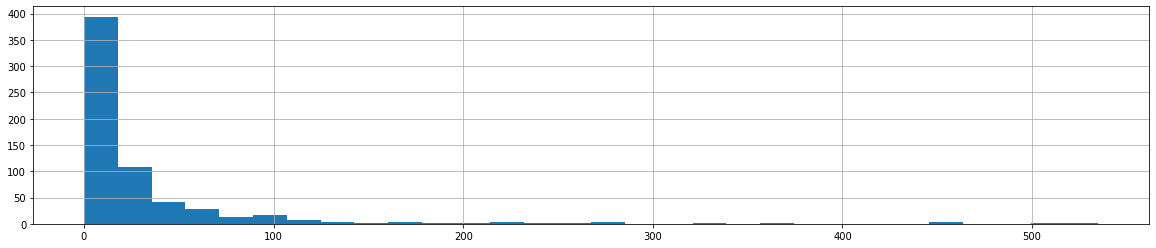

In [5]:
df['Review'].hist(bins=30, figsize=(20,4)); # как распределено количество отзывов

In [6]:
df[df['Review']>10]['sale_june'].count()

329

Попробуем предсказать будет ли у модели больше 10 отзывов или нет. В этмо случае у нас получается сбалансированный набор данных. Ниже выведем список столбцов и отберем те, которые будем использовать для классификатора.

In [7]:
df.columns # список столбцов нашего датасета 

Index(['id', 'Review', 'Star', 'Value', 'brandId', 'brandName', 'goodsName',
       'isSoldOut', 'link', 'lowQuantity', 'ordersCount', 'price',
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса', 'Модель',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет', 'sale_june'],
      dtype='object')

In [8]:
col=['Star', 'Value', 'brandId', 'ordersCount', 
       'qualityRate', 'Вес с упаковкой (кг)', 'Длина кабеля',
       'Количество температурных режимов', 'Материал корпуса',
       'Мощность устройства', 'Объем чайника', 'Страна бренда',
       'Страна производитель', 'Цвет'] # !!!!! Укажите здесь названия столбцов своего датасета!

# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [9]:
# результат, подготовленные данные
X.sample(3)

,Star,Value,brandId,ordersCount,qualityRate,Вес с упаковкой (кг),Длина кабеля,Количество температурных режимов,Материал корпуса,Мощность устройства,Объем чайника,Страна бренда,Страна производитель,Цвет
132,4.0,3125.0,18014.0,300.0,100.0,1.19,75.0,7,6,1800.0,1.6,1,0,11
59,3.0,3432.0,17106.0,200.0,100.0,1.60,0.7,0,5,2200.0,1.7,1,0,1
410,4.0,2390.0,16102.0,50.0,100.0,1.50,78.0,0,-1,2200.0,1.7,1,0,31


In [10]:
# Y будет равен нулю если отзывов 10 и меньше, и единице если больше 10
Y=df['Review'].apply(lambda x: 1 if x>10 else 0).values

In [11]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3634, 'ordersCount'],
 [0.0782, 'brandId'],
 [0.0778, 'Star'],
 [0.0664, 'Страна бренда'],
 [0.0661, 'Вес с упаковкой (кг)'],
 [0.066, 'Value'],
 [0.0651, 'Цвет'],
 [0.0513, 'qualityRate'],
 [0.0453, 'Длина кабеля'],
 [0.033, 'Материал корпуса'],
 [0.0328, 'Мощность устройства'],
 [0.0278, 'Объем чайника'],
 [0.0223, 'Количество температурных режимов'],
 [0.0044, 'Страна производитель']]

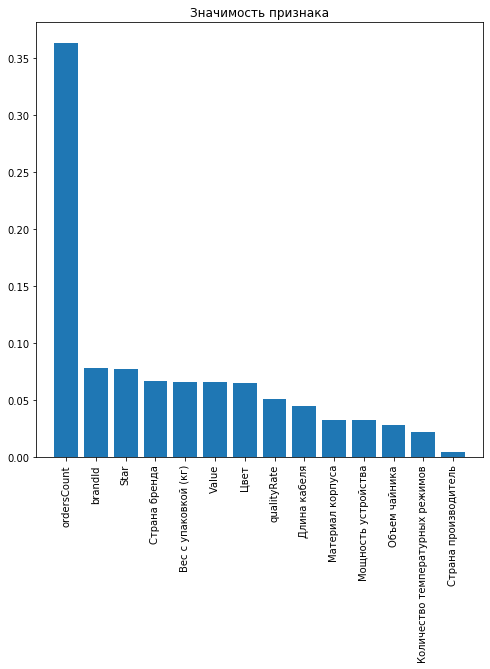

In [14]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [15]:
# как выглядит результат предсказания для тестовой выборки
model.predict(X_test)

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [16]:
# как выглядядт результаты тестового набора
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [17]:
# метрика r2
r2_score(model.predict(X_test), y_test)

0.4342105263157895

In [18]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.8604651162790697


In [19]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[50, 11],
       [ 7, 61]])

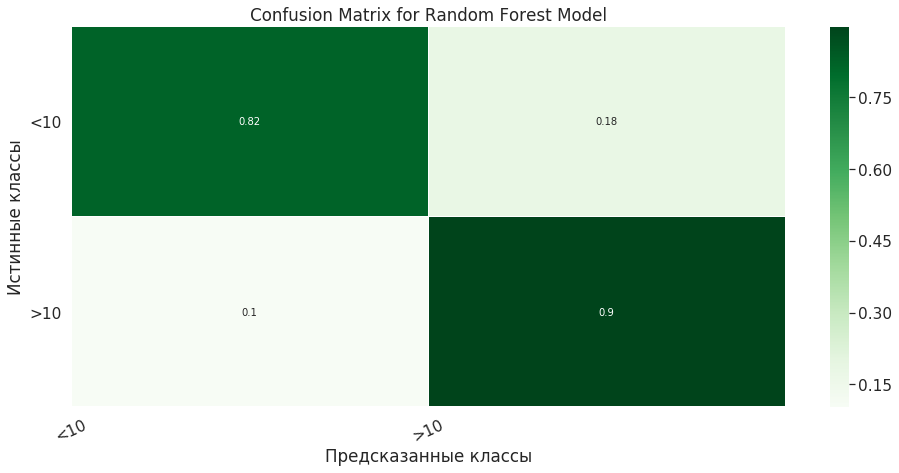

In [20]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['<10', '>10']                 # !!!!!! указать названия классов!
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [21]:
# Еще базовые метрики оценки точности модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        61
           1       0.85      0.90      0.87        68

    accuracy                           0.86       129
   macro avg       0.86      0.86      0.86       129
weighted avg       0.86      0.86      0.86       129

